In [1]:
## Let's start

In [51]:
from PIL import Image
import pytesseract
import numpy as np
import cv2
import pandas as pd
from pytesseract import Output

In [52]:
## Loading the image :

image_1 = cv2.imread("INVOICE.jpg", 0) ## Loading image directly as black & white.
image_2 = cv2.imread("INVOICE1.jpg", 0) ## Loading image directly as black & white.
image_3 = cv2.imread("INVOICE2.jpg", 0) ## Loading image directly as black & white.

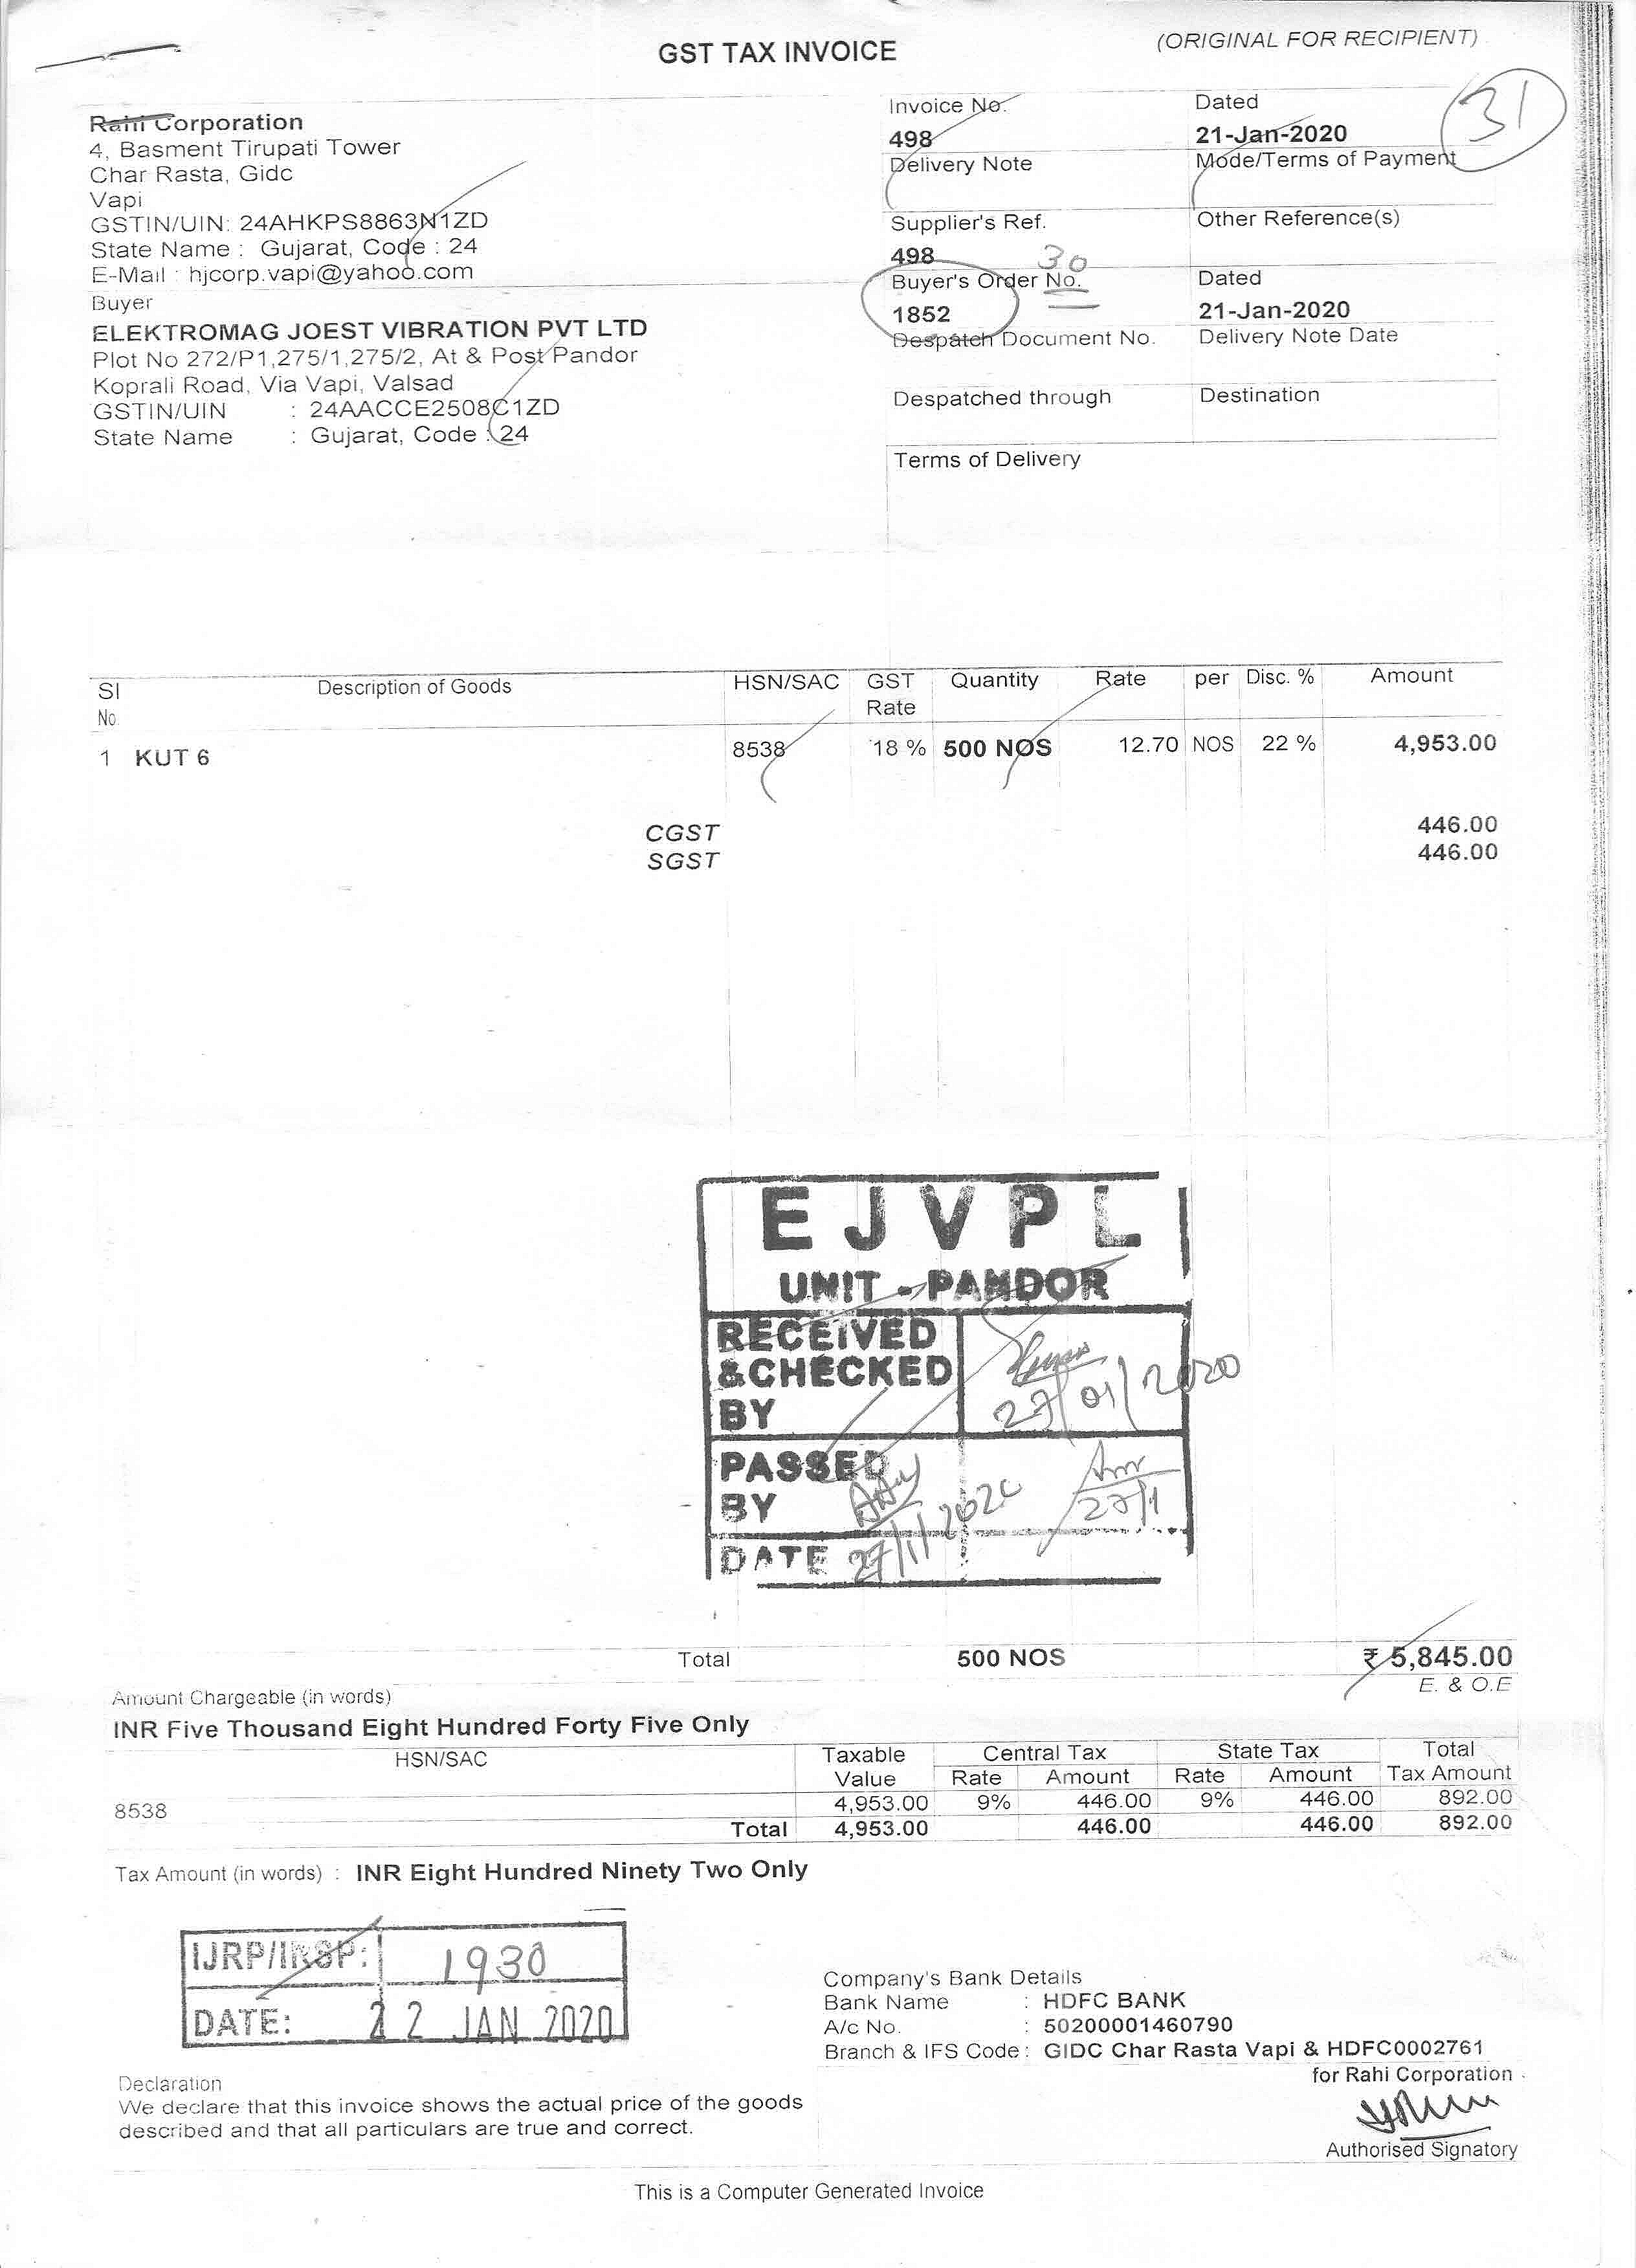

In [53]:
# This box can be avoided. Kept just to show another way of sharpening :

sharpen = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")
image_1_sharp = cv2.filter2D(image_1, -1, sharpen)

image_1_sharp_pil = Image.fromarray(image_1_sharp)
display(image_1_sharp_pil)

200.0 225.0 225.0


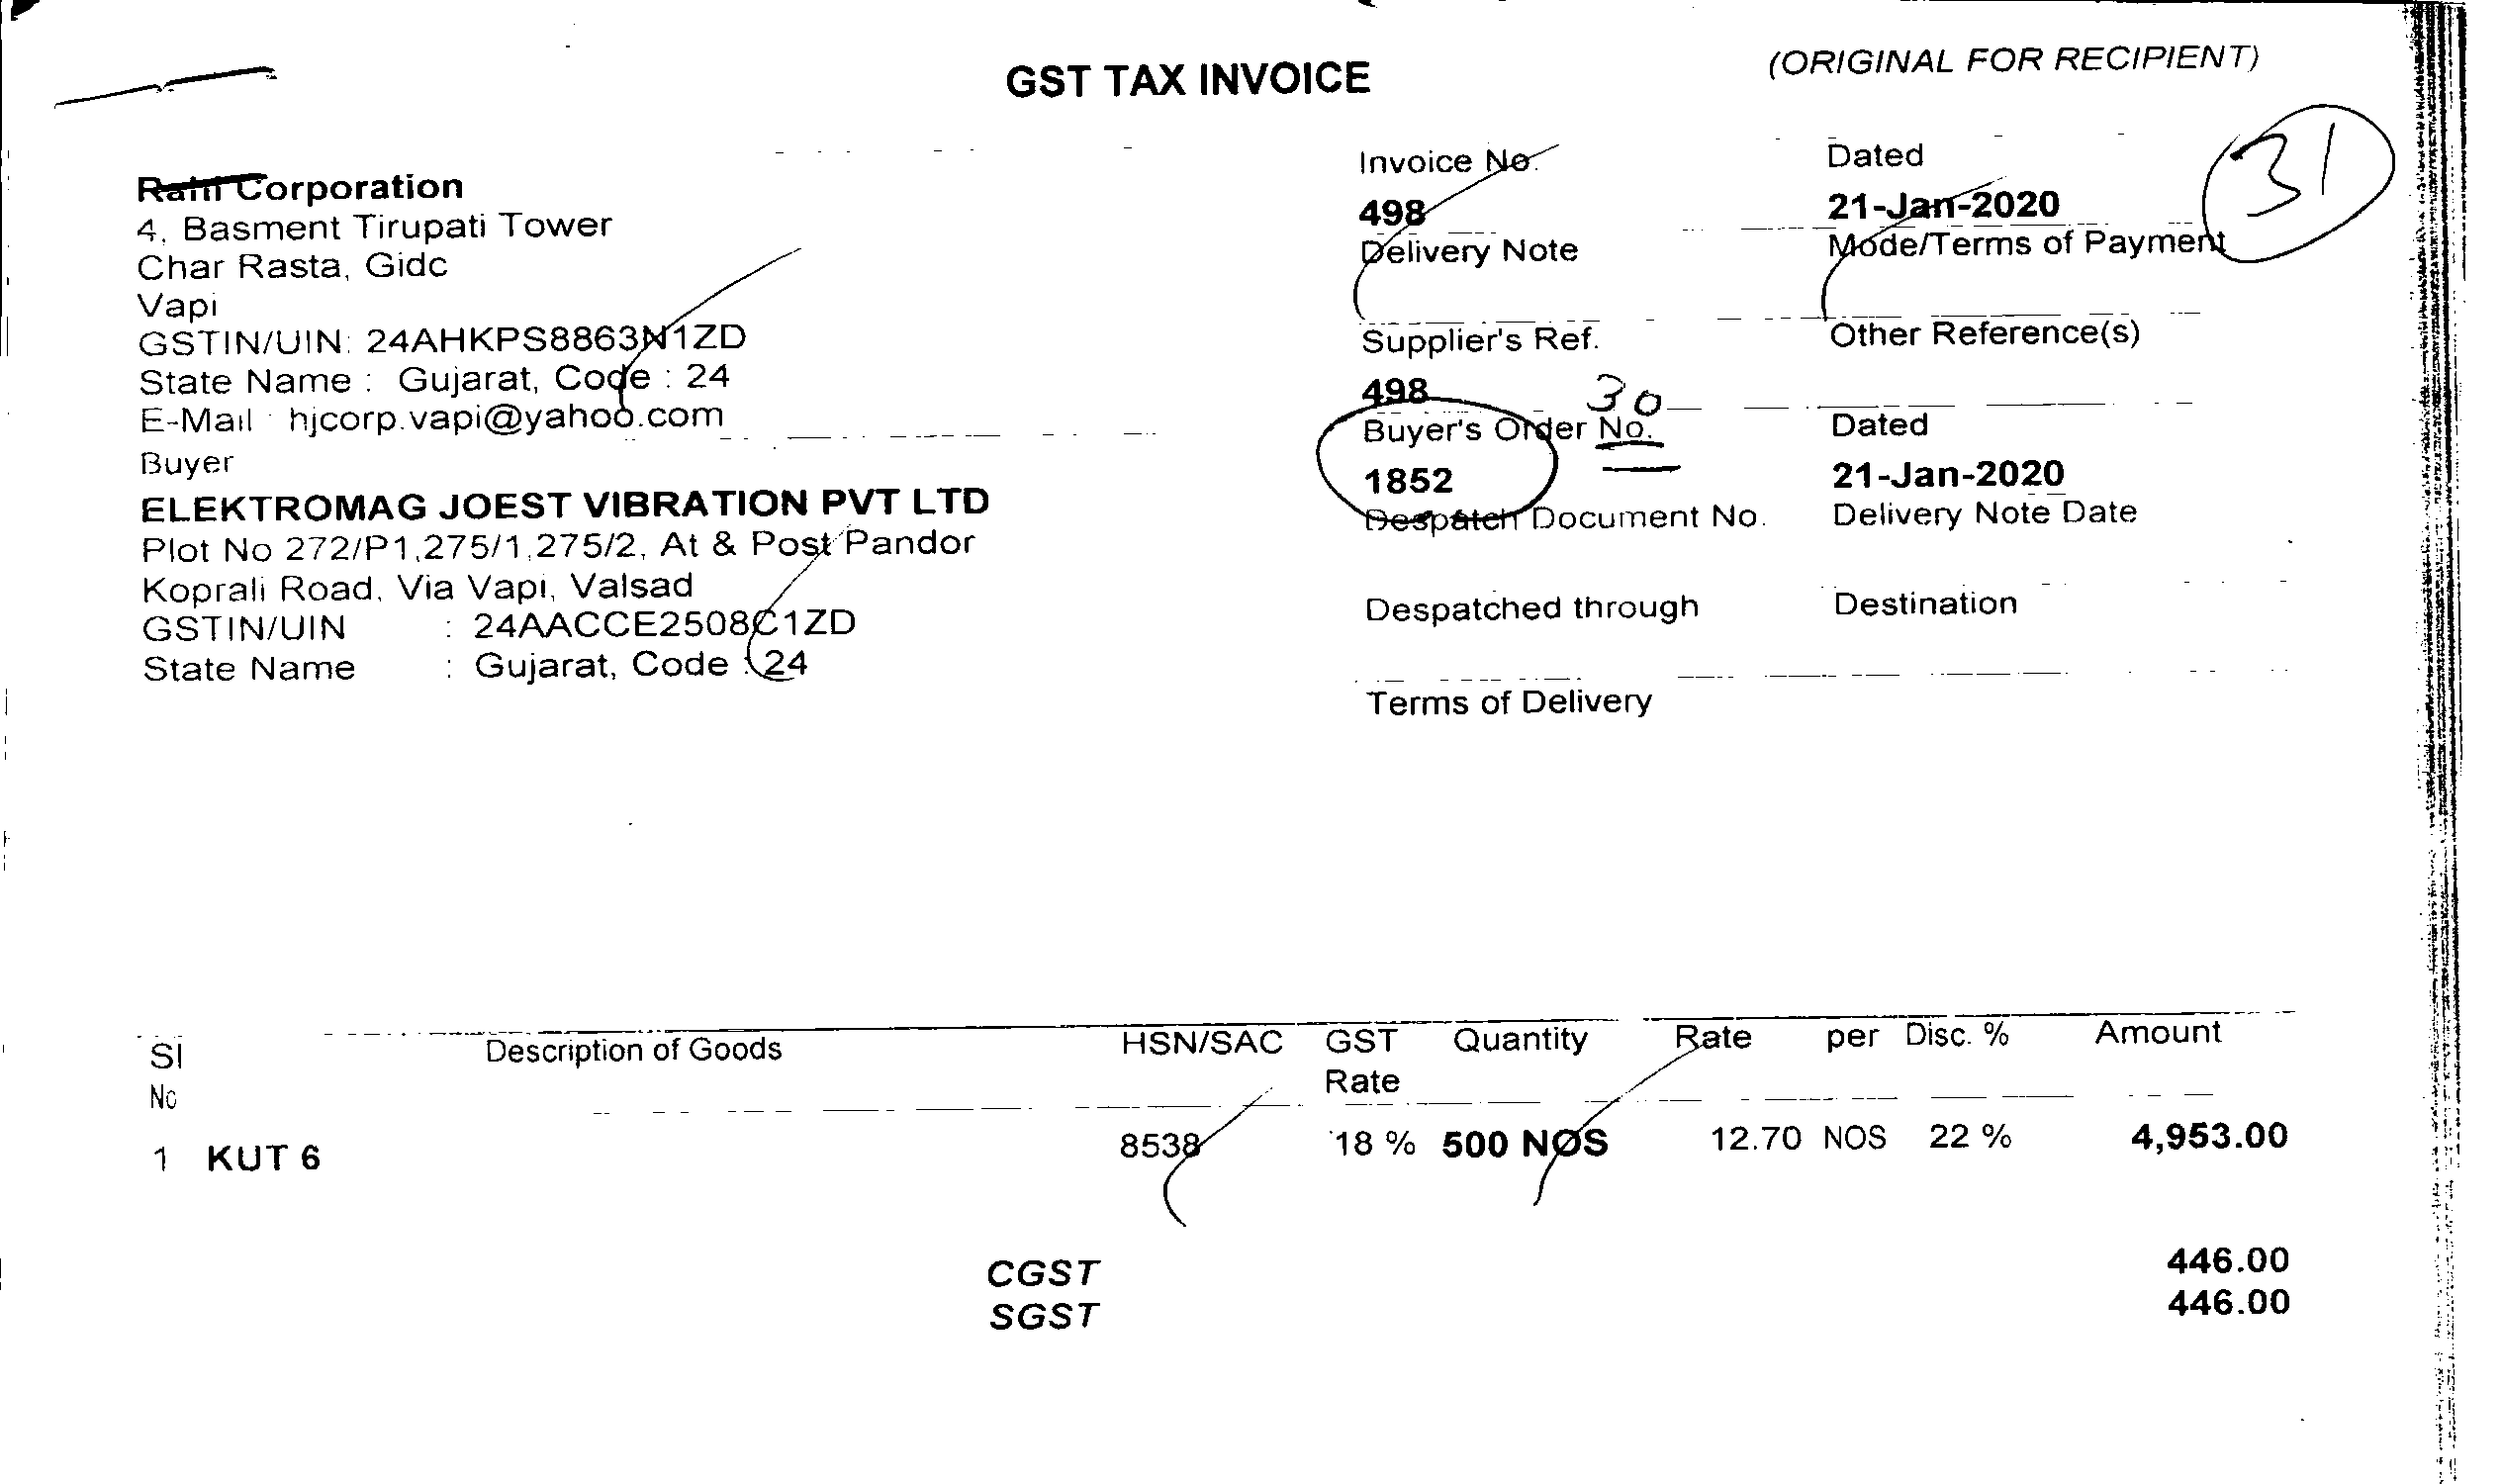

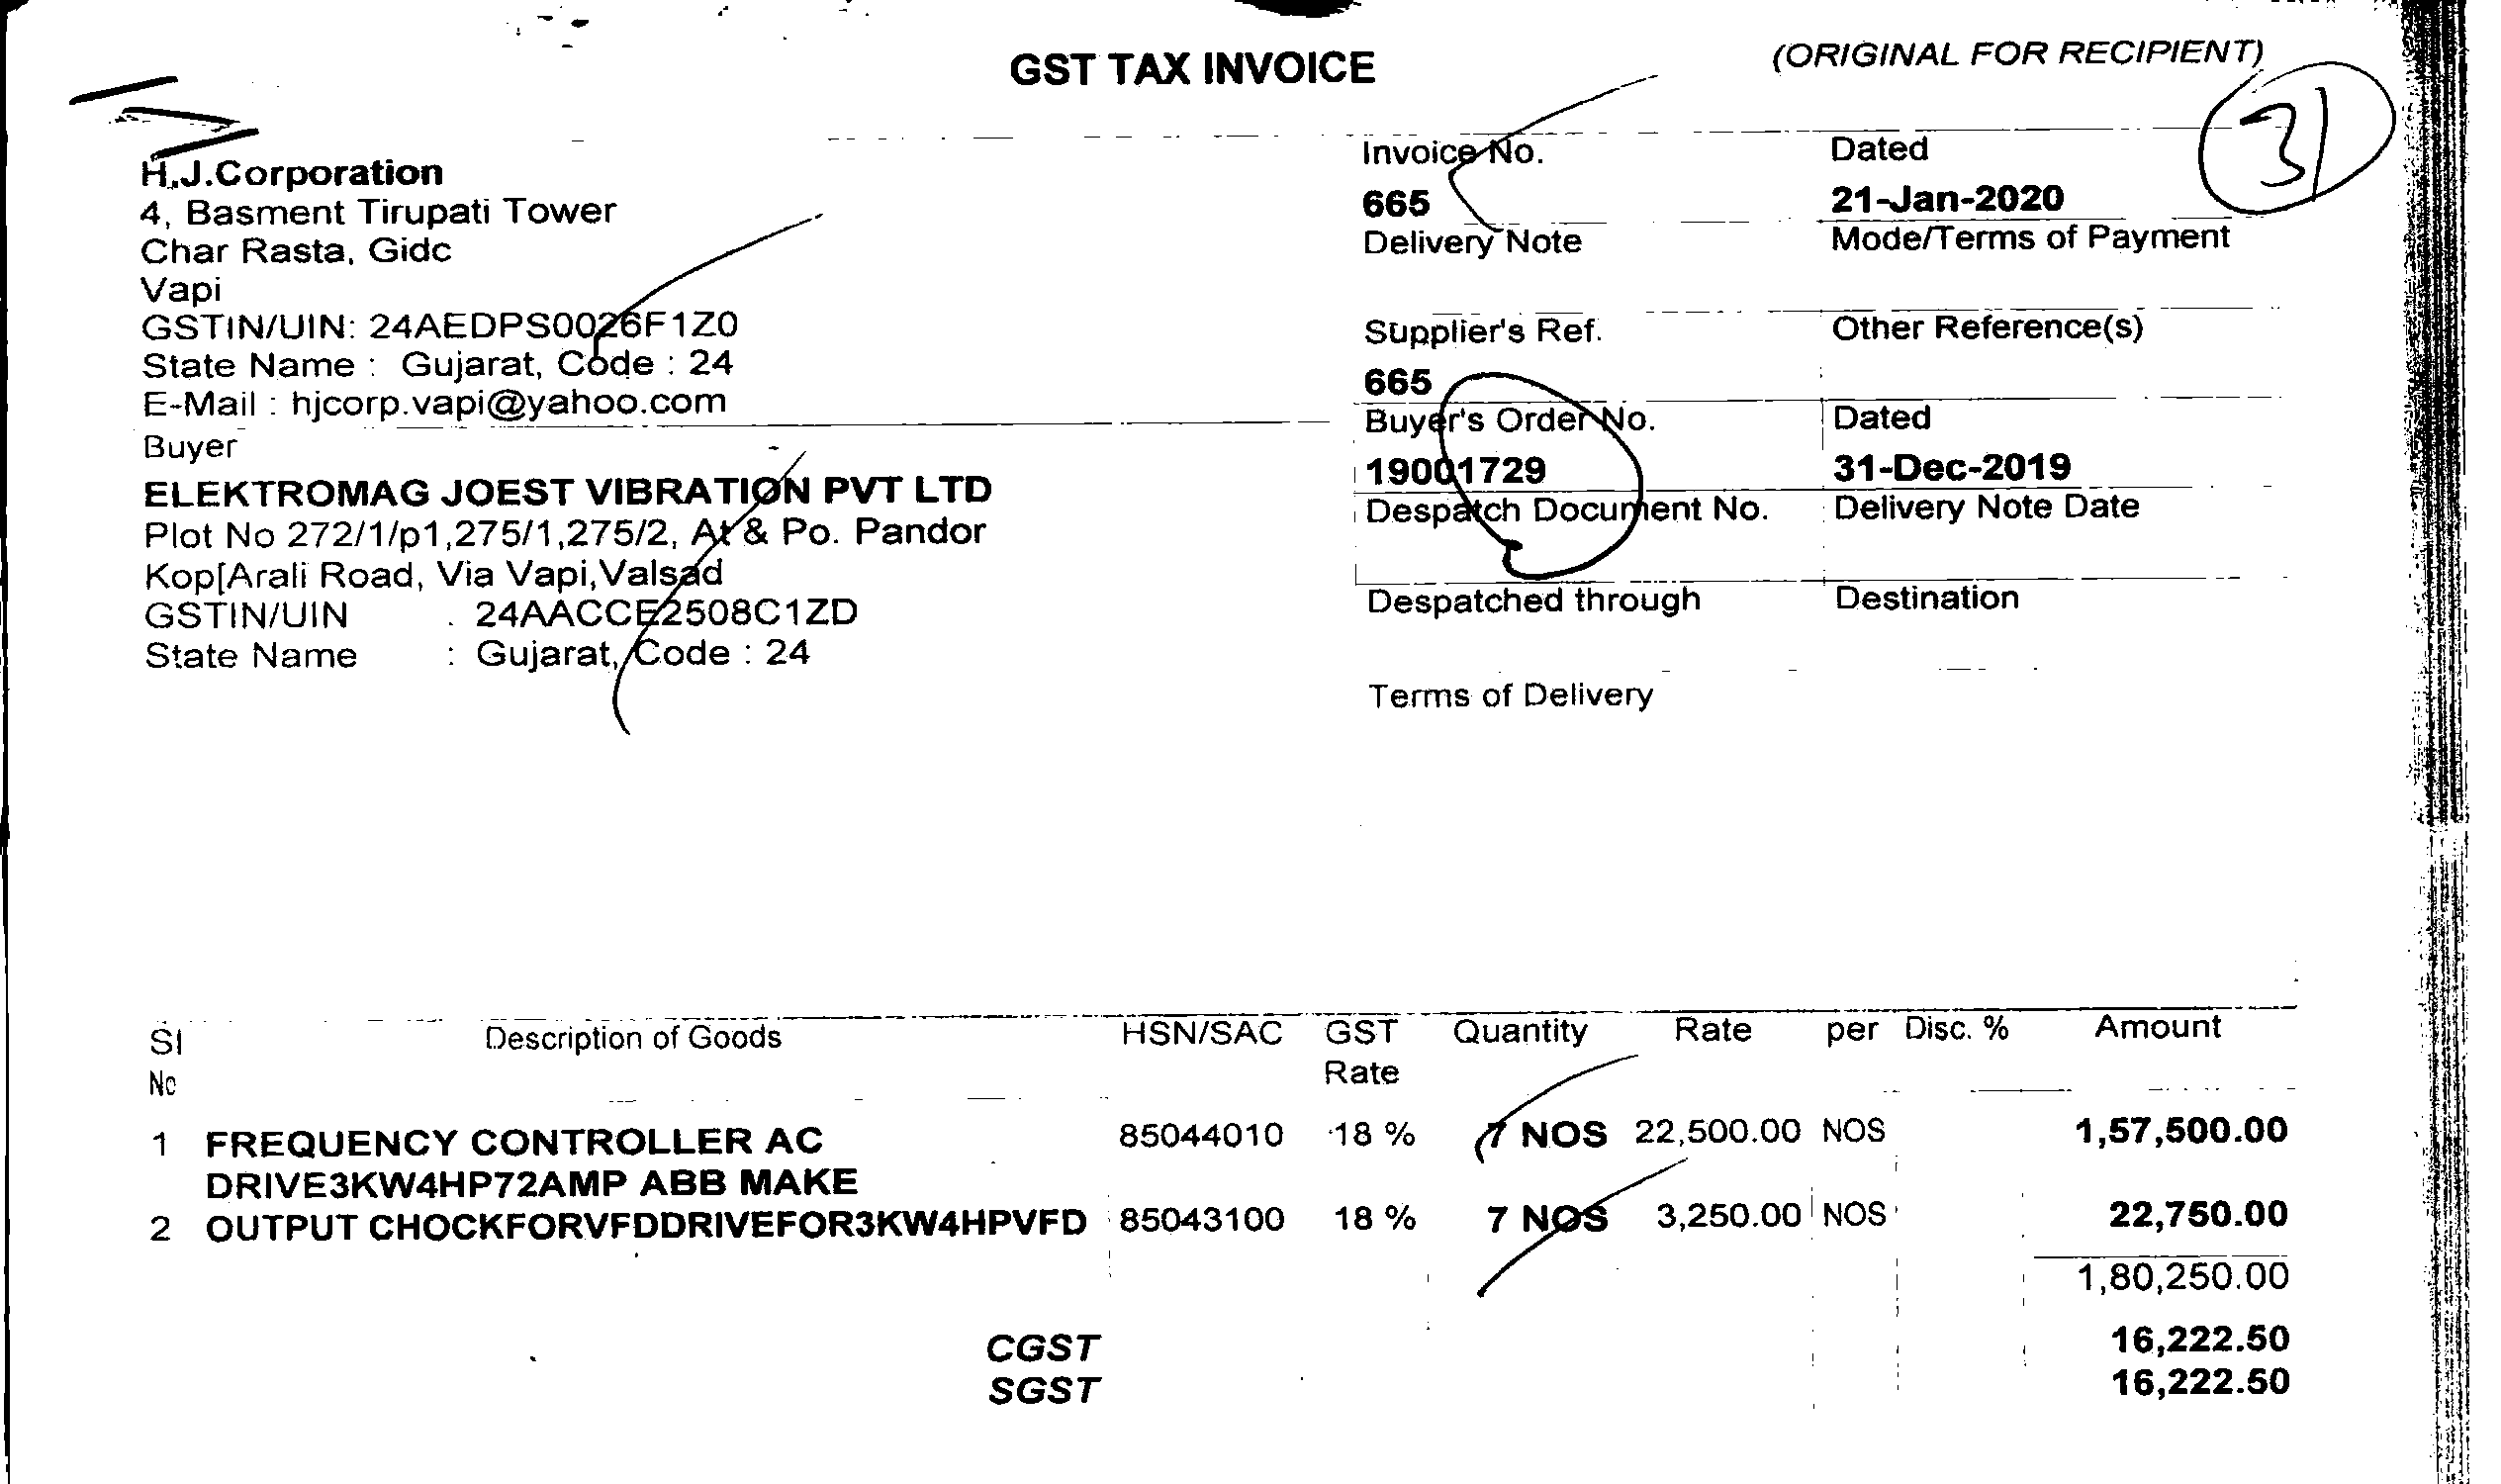

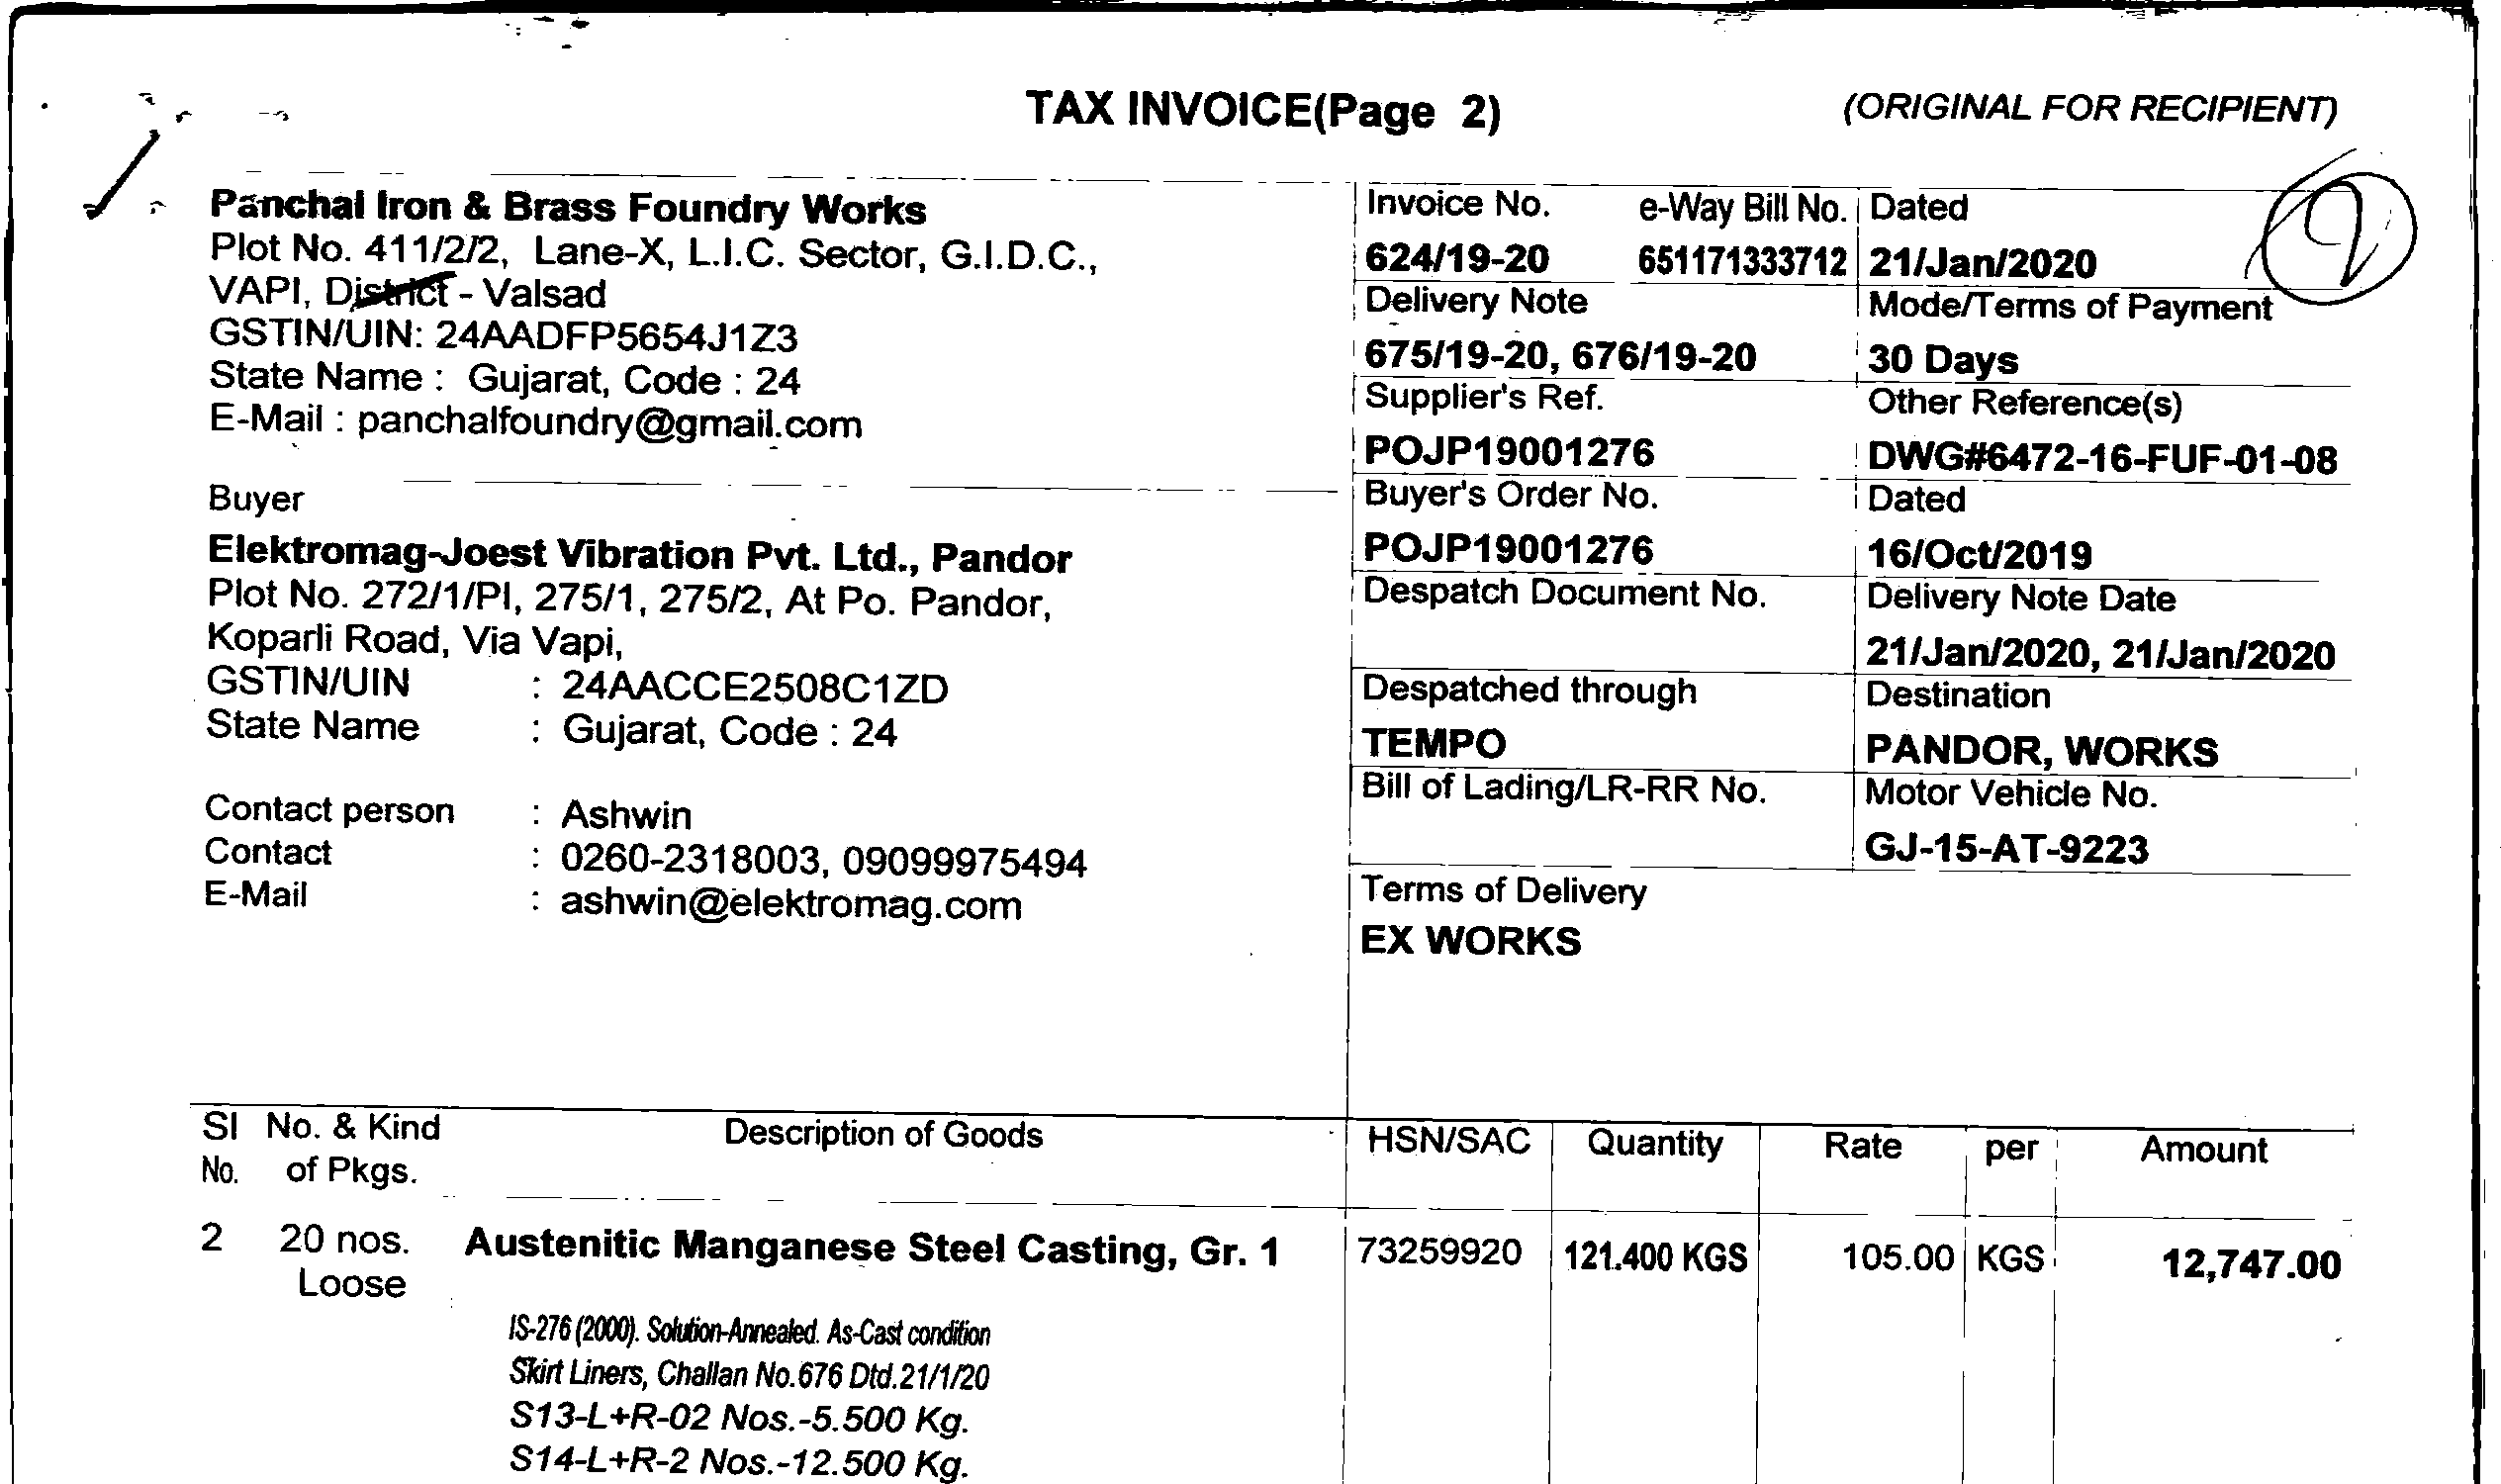

In [54]:
## image processing - sharpening the image :

ret_1, image_1_mask = cv2.threshold(image_1, 200, 255, cv2.THRESH_BINARY)
ret_2, image_2_mask = cv2.threshold(image_2, 225, 255, cv2.THRESH_BINARY)
ret_3, image_3_mask = cv2.threshold(image_3, 225, 255, cv2.THRESH_BINARY)

image_1_mask_pil = Image.fromarray(image_1_mask[0:1500, :])
image_2_mask_pil = Image.fromarray(image_2_mask[0:1500, :])
image_3_mask_pil = Image.fromarray(image_3_mask[0:1500, :])

print(ret_1, ret_2, ret_3)

display(image_1_mask_pil)
display(image_2_mask_pil)
display(image_3_mask_pil)


In [49]:
## Creating boundary boxes around text and getting details of boxes with text and creating data-frame :

image_1_data = pytesseract.image_to_data(image_1_mask, output_type=Output.DICT)
image_2_data = pytesseract.image_to_data(image_2_mask, output_type=Output.DICT)
image_3_data = pytesseract.image_to_data(image_3_mask, output_type=Output.DICT)

image_1_pd = pd.DataFrame(image_1_data)
image_2_pd = pd.DataFrame(image_2_data)
image_3_pd = pd.DataFrame(image_3_data)


In [29]:
image_1_pd.head()

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,3504,0,1,0,1,0,,0,2528,0
1,1,-1,13,1372,2,0,1,0,,0,444,0
2,1,-1,13,992,3,0,1,1,,0,824,0
3,1,-1,13,1372,4,1,1,1,,0,444,0
4,1,5,13,1372,5,1,1,1,C~,0,28,1


In [50]:
image_1_pd_sorted = image_1_pd.sort_values(['top', 'left']).reset_index()
image_1_pd_sorted.loc[0:50]


,index,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,0,-1,3504,0,1,0,1,0,,0,2528,0
1,380,15,-1,58,2407,2,0,1,0,,0,58,0
2,381,15,-1,58,2407,3,0,1,1,,0,58,0
3,382,15,-1,58,2407,4,1,1,1,,0,58,0
4,383,15,95,58,2407,5,1,1,1,,0,58,1
5,1,1,-1,60,57,2,0,1,0,,46,2215,0
6,2,1,-1,60,57,3,0,1,1,,46,2215,0
7,3,1,-1,60,57,4,1,1,1,,46,2215,0
8,11,1,84,6,2255,5,1,1,1,*,46,17,8
9,10,1,89,23,2078,5,1,1,1,RECIPIEN,47,166,7


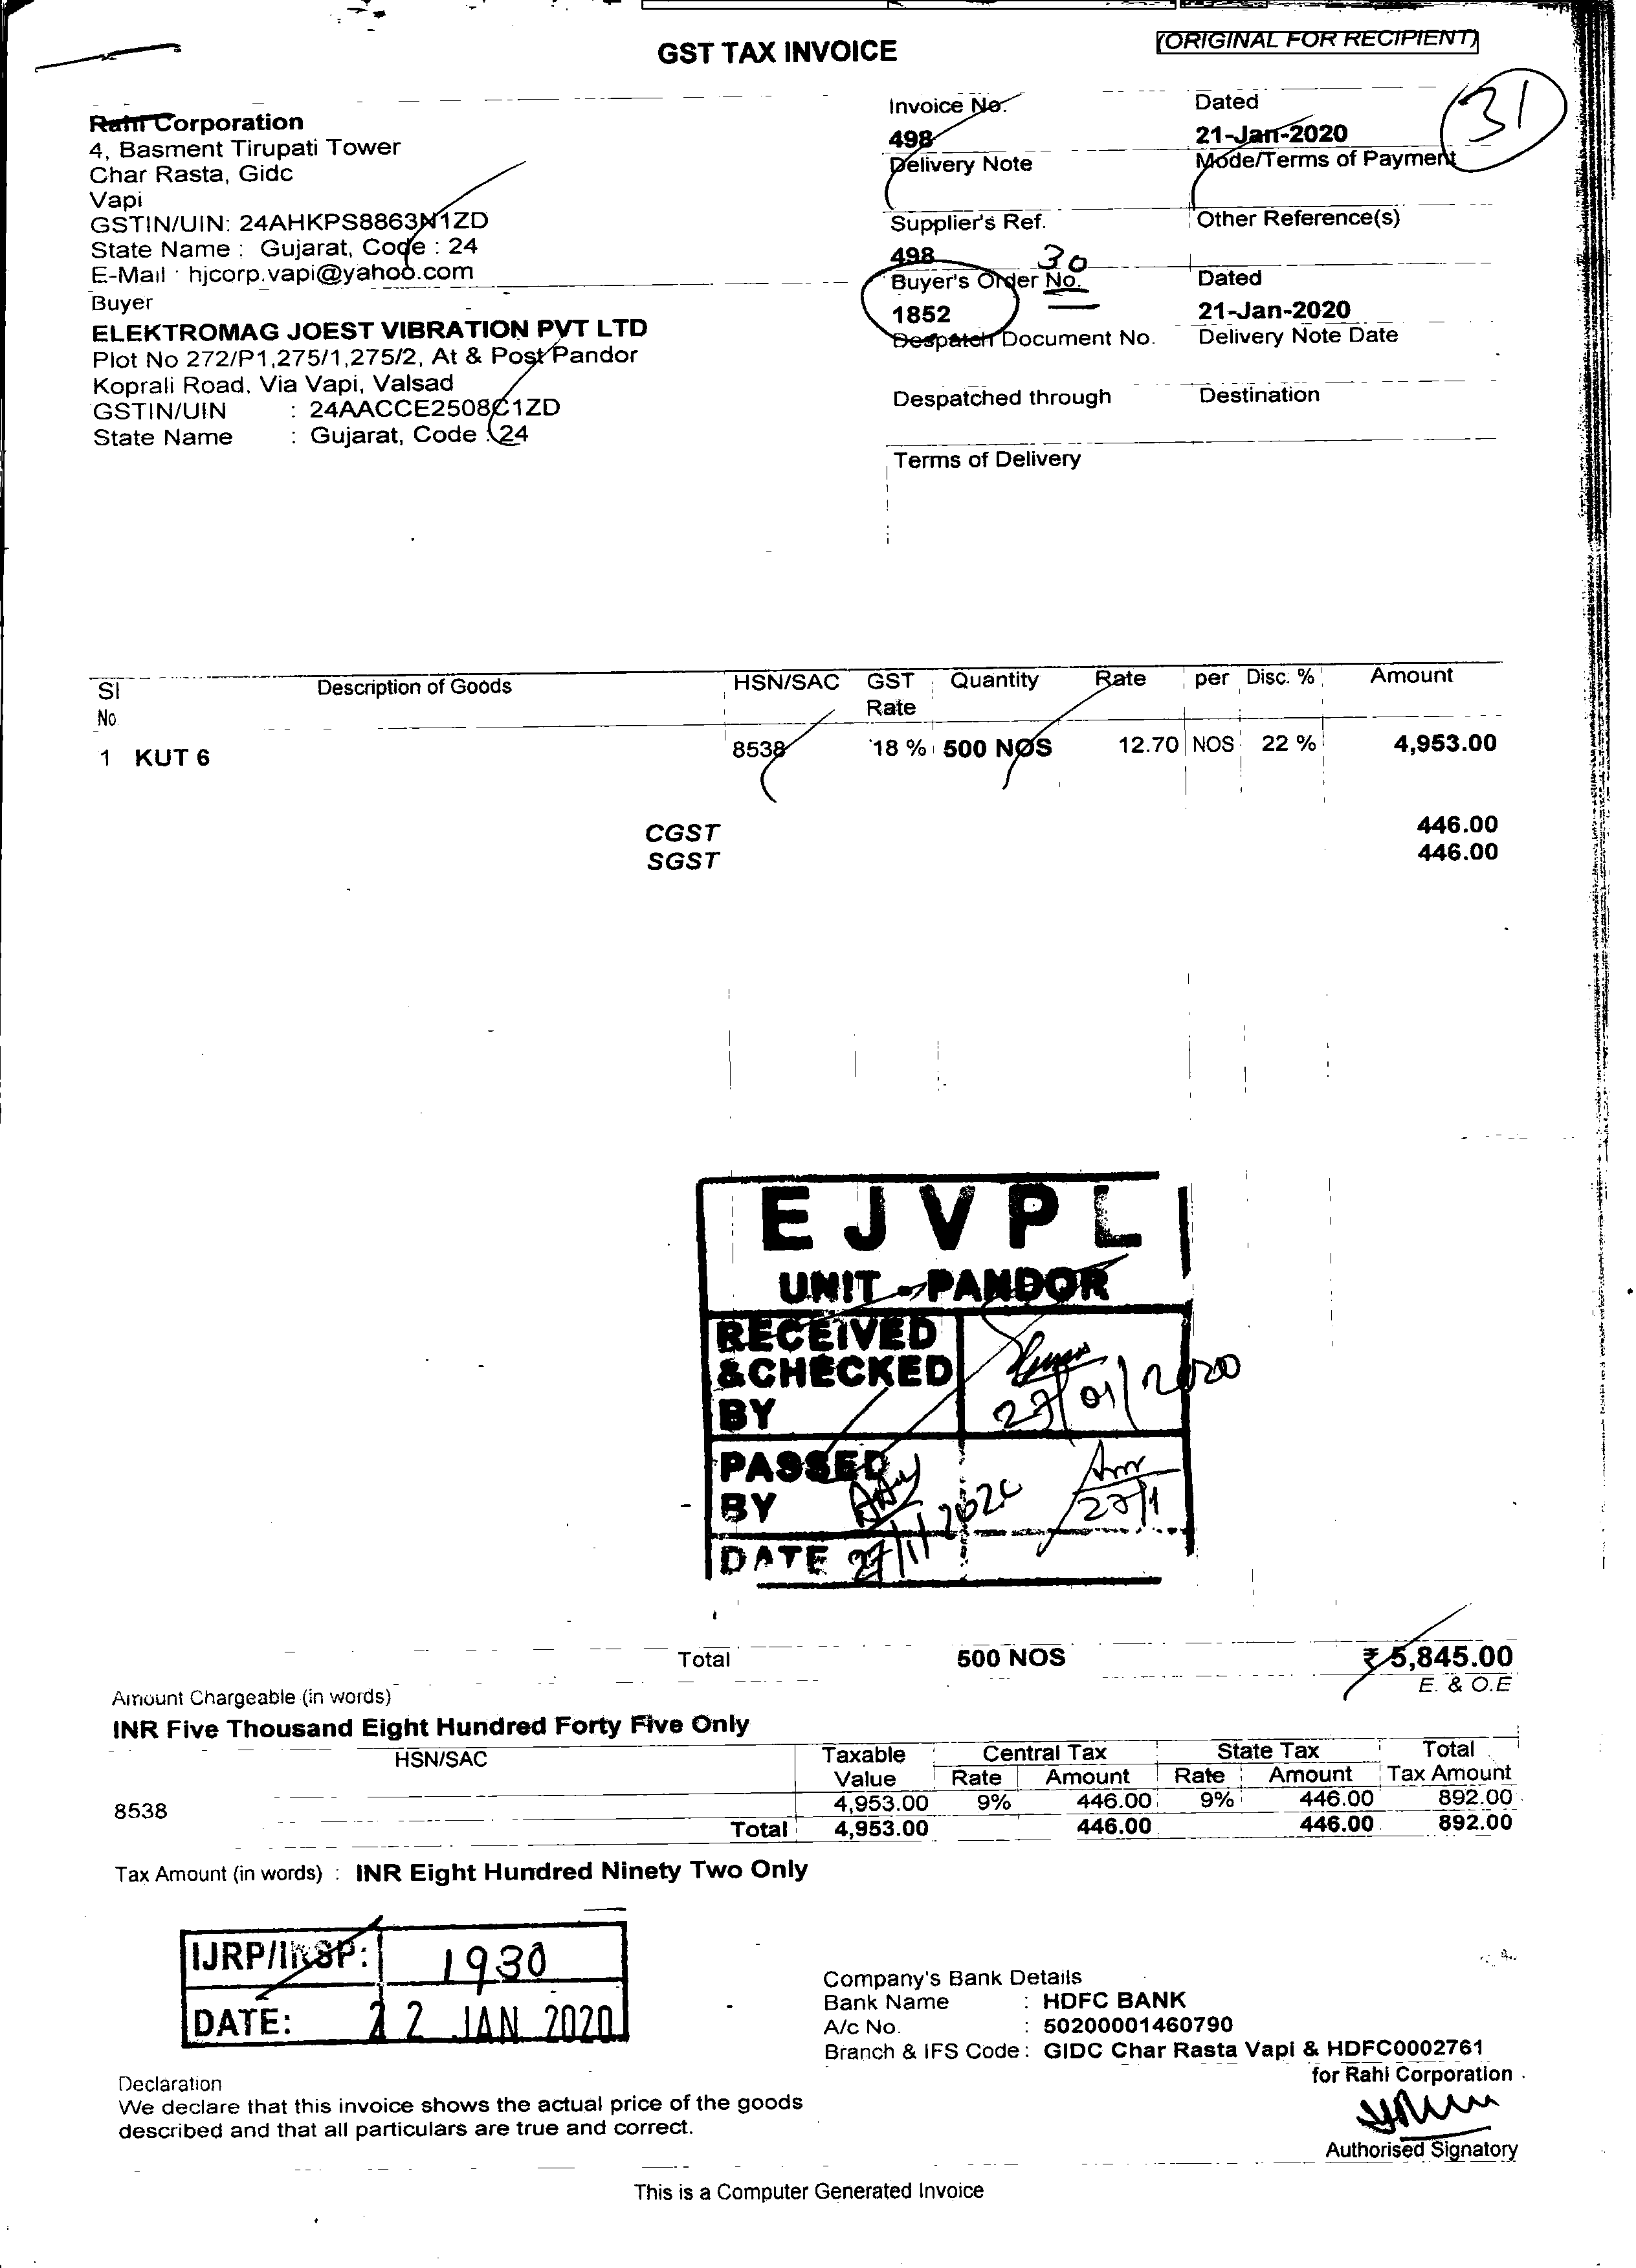

In [20]:
image_1_test_mask = image_1_mask.copy()
image_1_test_mask = cv2.rectangle(image_1_test_mask, (992, 0), (1816, 13), 0, 2)
image_1_test_mask = cv2.rectangle(image_1_test_mask, (1372, 0), (1816, 13), 0, 2)
image_1_test_mask = cv2.rectangle(image_1_test_mask, (1824, 0), (1957, 11), 0, 2)
image_1_test_mask = cv2.rectangle(image_1_test_mask, (1788, 49), (2283, 82), 0, 2)

image_1_test_mask_pil = Image.fromarray(image_1_test_mask)
display(image_1_test_mask_pil)

In [82]:
image_2_pd.head()

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,3504,0,1,0,1,0,,0,2528,0
1,1,-1,32,523,2,0,1,0,,0,1837,0
2,1,-1,32,523,3,0,1,1,,0,1837,0
3,1,-1,32,523,4,1,1,1,,0,1837,0
4,1,2,26,523,5,1,1,1,29—,6,45,1


In [83]:
image_3_pd.head()

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,0,-1,3504,0,1,0,1,0,,0,2528,0
1,1,-1,102,84,2,0,1,0,,131,892,0
2,1,-1,102,84,3,0,1,1,,131,892,0
3,1,-1,102,84,4,1,1,1,,131,892,0
4,1,50,91,84,5,1,1,1,;/.«,131,84,1


In [84]:
print(len(image_1_pd), len(image_2_pd), len(image_3_pd))

548 491 664


In [85]:
image_1_pd['text'] = image_1_pd['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case
image_1_pd['text'] = image_1_pd['text'].str.replace(r'\b\d+\b','')  ## remove integers
image_1_pd['text'] = image_1_pd['text'].str.replace(r'\W','')   ## remove puntuations
image_1_pd['text'] = image_1_pd['text'].str.replace(r'\b\w\b','') ## remove stand alone single letters
image_1_pd['text'] = image_1_pd['text'].str.replace(r'^[ \t\n]*$','') ## remove all blanks to single blank i.e. ''
image_1_pd['text'].replace('', np.nan, inplace = True)
image_1_pd.dropna(subset=['text'], inplace = True)
image_1_pd = image_1_pd.reset_index(drop=True)

image_2_pd['text'] = image_2_pd['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case
image_2_pd['text'] = image_2_pd['text'].str.replace(r'\b\d+\b','')  ## remove integers
image_2_pd['text'] = image_2_pd['text'].str.replace(r'\W','')   ## remove puntuations
image_2_pd['text'] = image_2_pd['text'].str.replace(r'\b\w\b','') ## remove stand alone single letters
image_2_pd['text'] = image_2_pd['text'].str.replace(r'^[ \t\n]*$','') ## remove all blanks to single blank i.e. ''
image_2_pd['text'].replace('', np.nan, inplace = True)
image_2_pd.dropna(subset=['text'], inplace = True)
image_2_pd = image_1_pd.reset_index(drop=True)

image_3_pd['text'] = image_3_pd['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case
image_3_pd['text'] = image_3_pd['text'].str.replace(r'\b\d+\b','')  ## remove integers
image_3_pd['text'] = image_3_pd['text'].str.replace(r'\W','')   ## remove puntuations
image_3_pd['text'] = image_3_pd['text'].str.replace(r'\b\w\b','') ## remove stand alone single letters
image_3_pd['text'] = image_3_pd['text'].str.replace(r'^[ \t\n]*$','') ## remove all blanks to single blank i.e. ''
image_3_pd['text'].replace('', np.nan, inplace = True)
image_3_pd.dropna(subset=['text'], inplace = True)
image_3_pd = image_1_pd.reset_index(drop=True)


print(len(image_1_pd), len(image_2_pd), len(image_3_pd))


217 217 217


In [86]:
image_1_pd.head()

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,1,0,6,1765,5,1,1,1,ro,2,19,5
1,1,11,6,1798,5,1,1,1,lc,0,18,6
2,14,90,34,1017,5,1,1,1,gst,65,87,2
3,14,91,34,1115,5,1,1,1,tax,64,84,3
4,14,90,35,1213,5,1,1,1,invoice,61,173,4


In [87]:
image_2_pd.head()

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,1,0,6,1765,5,1,1,1,ro,2,19,5
1,1,11,6,1798,5,1,1,1,lc,0,18,6
2,14,90,34,1017,5,1,1,1,gst,65,87,2
3,14,91,34,1115,5,1,1,1,tax,64,84,3
4,14,90,35,1213,5,1,1,1,invoice,61,173,4


In [88]:
image_3_pd.head()

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,1,0,6,1765,5,1,1,1,ro,2,19,5
1,1,11,6,1798,5,1,1,1,lc,0,18,6
2,14,90,34,1017,5,1,1,1,gst,65,87,2
3,14,91,34,1115,5,1,1,1,tax,64,84,3
4,14,90,35,1213,5,1,1,1,invoice,61,173,4


In [92]:
for i in range(len(image_1_pd)): 
    if image_1_pd['text'][i] == 'invoice':
        y = image_1_pd['top'][i]
        x = image_1_pd['left'][i]
        w = image_1_pd['width'][i]
        h = image_1_pd['height'][i]
        print('top = ', y, 'left = ', x, 'width = ', w, 'height = ', h)
        

top =  61 left =  1213 width =  173 height =  35
top =  144 left =  1375 width =  113 height =  32
top =  3241 left =  525 width =  114 height =  23
top =  3372 left =  1421 width =  99 height =  25


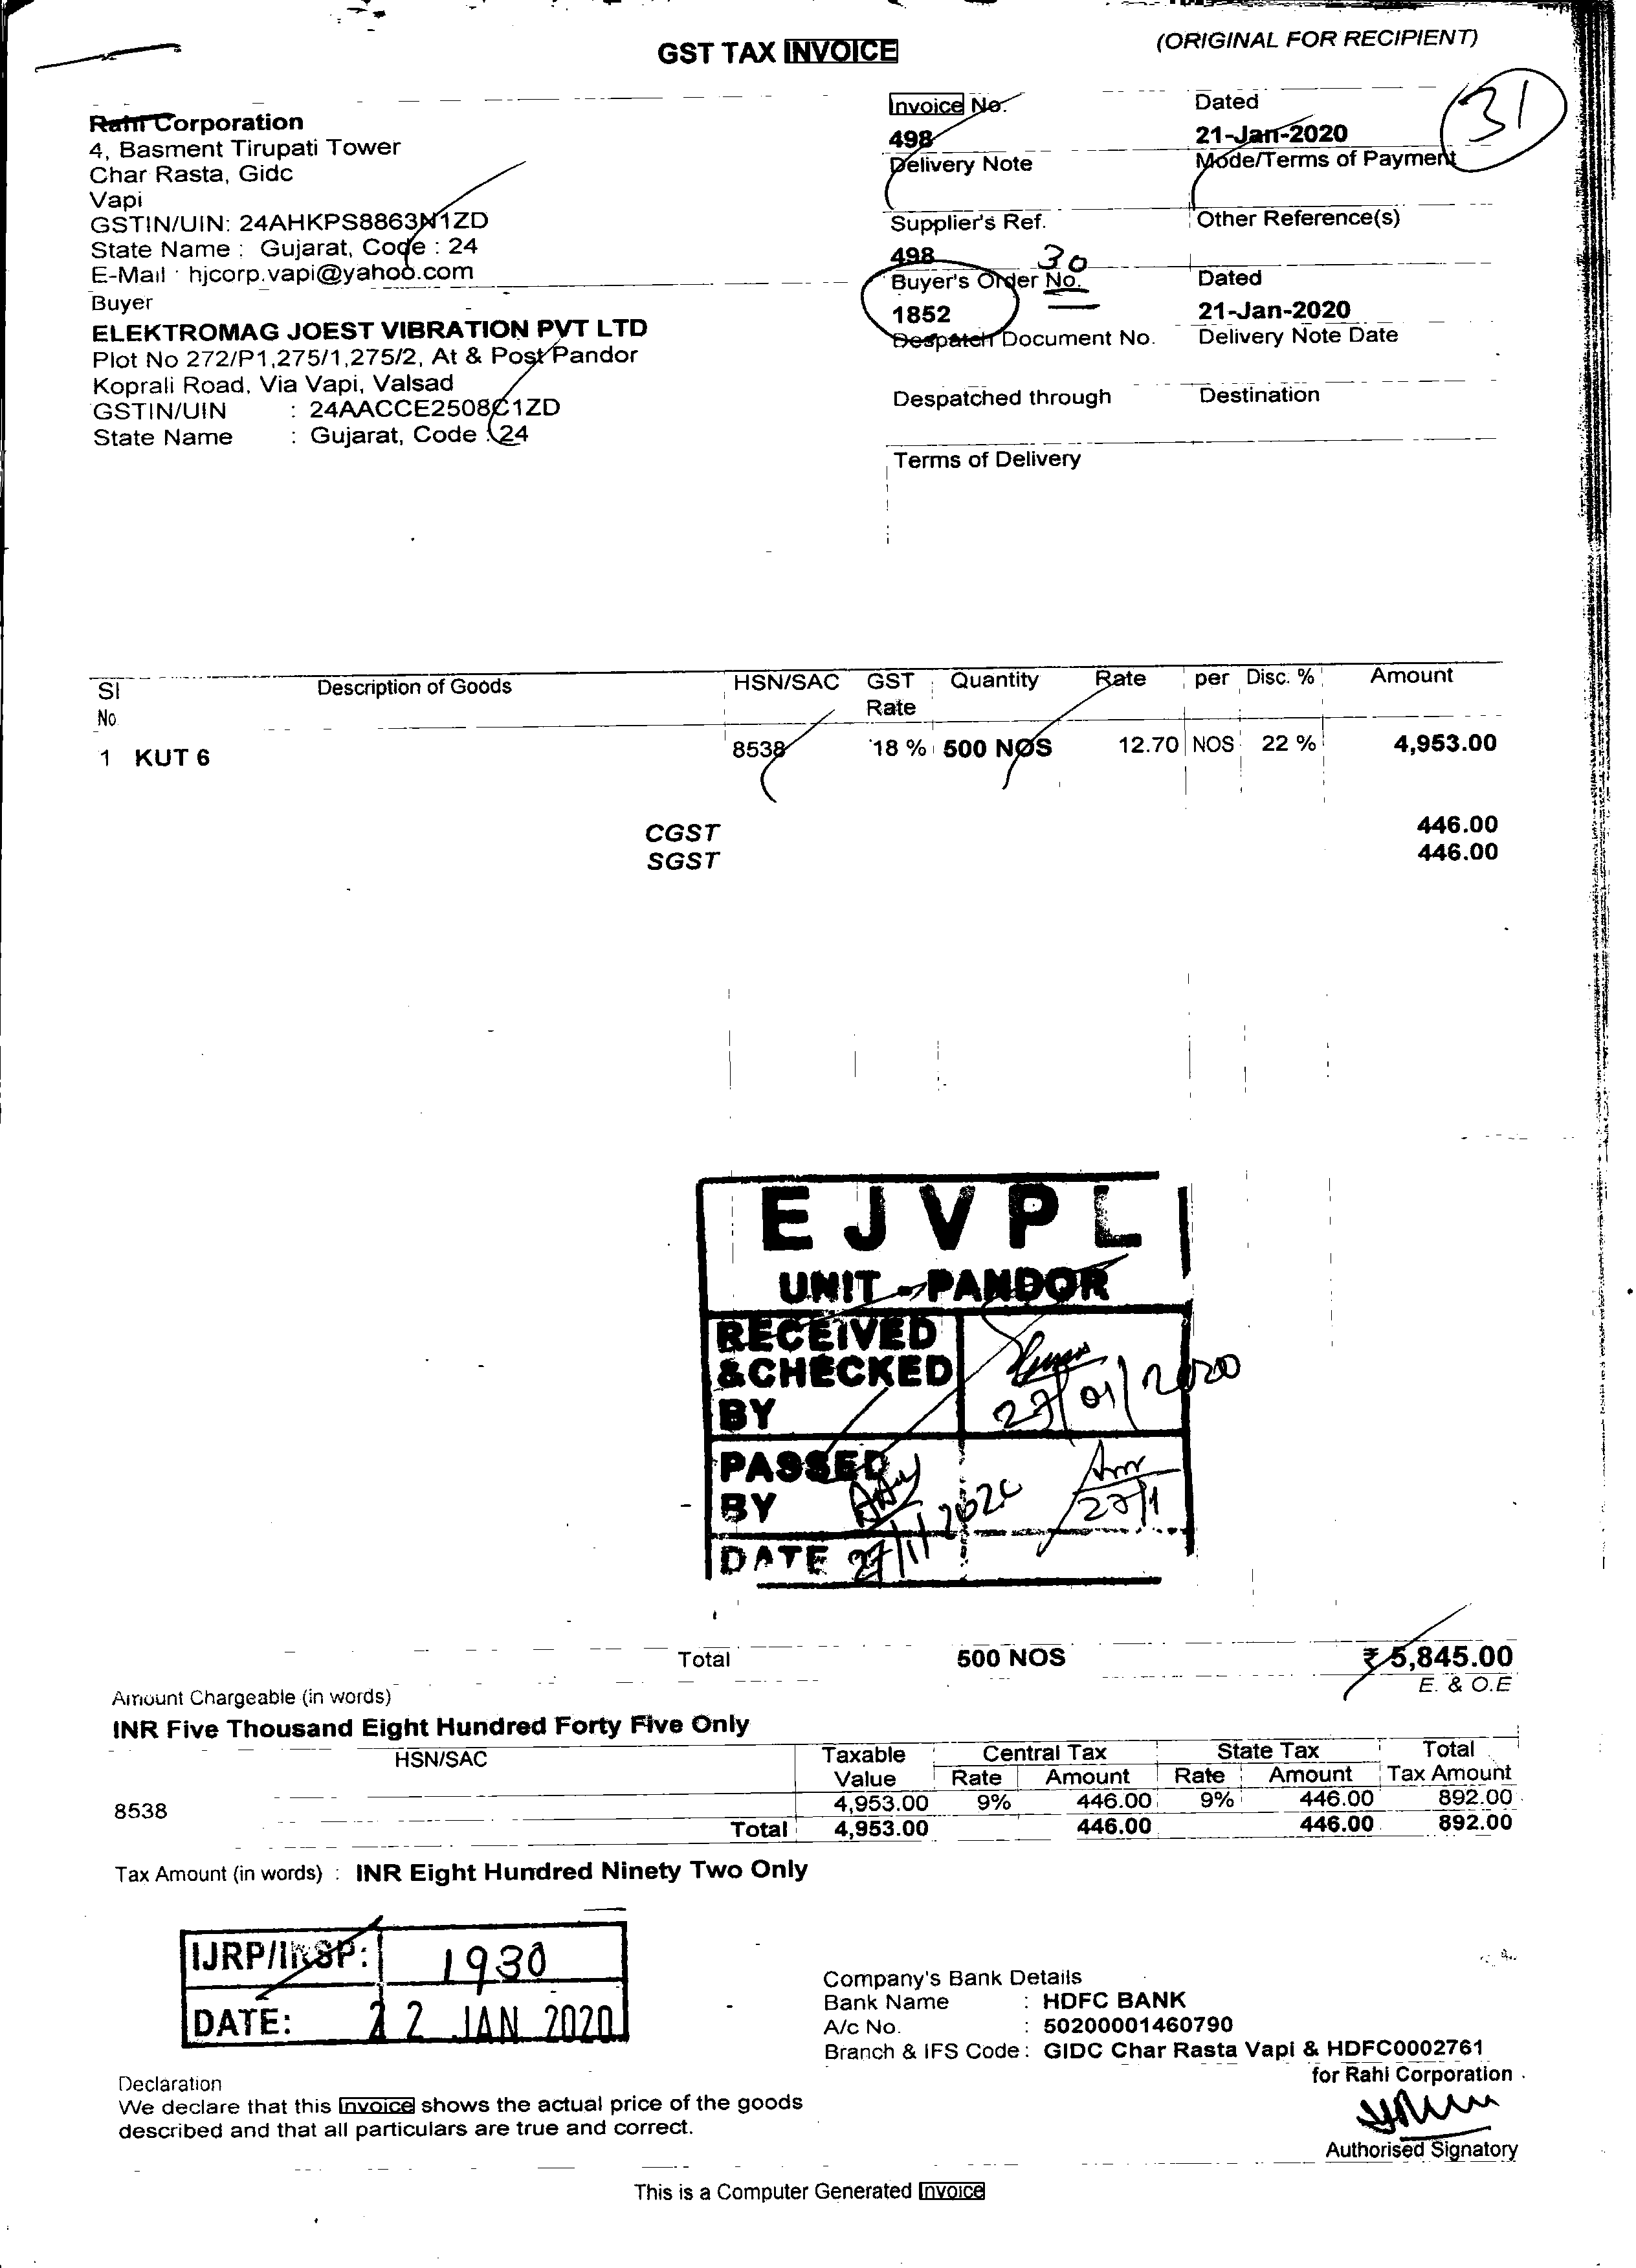

In [105]:
image_1_mask = cv2.rectangle(image_1_mask, (1213, 61), (1386, 96), 0, 2)
image_1_mask = cv2.rectangle(image_1_mask, (1375, 144), (1488, 176), 0, 2)
image_1_mask = cv2.rectangle(image_1_mask, (525, 3241), (639, 3264), 0, 2)
image_1_mask = cv2.rectangle(image_1_mask, (1421, 3372), (1520, 3397), 0, 2)

image_1_mask_pil = Image.fromarray(image_1_mask)
display(image_1_mask_pil)

In [109]:
for i in range(len(image_1_pd)): 
    if image_1_pd['text'][i] == 'gstinuin':
        y = image_1_pd['top'][i]
        x = image_1_pd['left'][i]
        w = image_1_pd['width'][i]
        h = image_1_pd['height'][i]
        print('top = ', y, 'left = ', x, 'width = ', w, 'height = ', h)
        

top =  333 left =  141 width =  213 height =  27
top =  622 left =  145 width =  203 height =  26


In [108]:
image_1_pd

,block_num,conf,height,left,level,line_num,page_num,par_num,text,top,width,word_num
0,1,0,6,1765,5,1,1,1,ro,2,19,5
1,1,11,6,1798,5,1,1,1,lc,0,18,6
2,14,90,34,1017,5,1,1,1,gst,65,87,2
3,14,91,34,1115,5,1,1,1,tax,64,84,3
4,14,90,35,1213,5,1,1,1,invoice,61,173,4
5,14,89,33,1788,5,1,1,1,original,49,187,5
6,14,91,26,1988,5,1,1,1,for,48,78,6
7,14,88,29,2077,5,1,1,1,recipient,45,206,7
8,14,25,44,139,5,2,1,1,rehtc,160,133,1
9,14,49,50,269,5,2,1,1,orporaion,159,199,2
